# Import

In [2]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import portablelogresmodel as model
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import roc_curve
from imblearn.over_sampling import RandomOverSampler

In [3]:
filepath = 'Datasets/dec_sep_MPHWA.csv'
df = pd.read_csv(filepath)
df = df.reset_index()

filepath_ = 'Other_functions/df_MPHWA_Athletics_3.csv'
df_ = pd.read_csv(filepath_)
df_ = df_.reset_index()

In [4]:
def EvenDF(df, rng):
    # Split dataframe into won a medal and didnt win a medal
    df_1 = df[df.MedalEarned == 1]
    df_0 = df[df.MedalEarned == 0]
    
    # Randomly sample df_0 to size of df_1
    df_0 = df_0.sample(n = len(df_1), random_state=rng.integers(100000))
    
    return df_1, df_0


def TrainValidate(df, rng):
    # Randomly sample df_0 to size of df_1
    df_1, df_0 = EvenDF(df, rng)
    
    # Randomly sample validate df_1 and df_0
    df_1_validate = df_1.sample(frac= 0.2, random_state=rng.integers(100000))
    df_0_validate = df_0.sample(frac= 0.2, random_state=rng.integers(100000))
    
    # Remove validation samples from df_1 and df_0
    # The rest of df_1 and df_0 are training
    df_1_train = df_1.drop(df_1_validate.index)
    df_0_train = df_0.drop(df_0_validate.index)
    
    # concatinate training and validation
    df_validate_list = [df_1_validate, df_0_validate]
    df_train_list =    [df_1_train, df_0_train]
    
    df_validate = pd.concat(df_validate_list)
    df_train =    pd.concat(df_train_list)
    
    # Reduce and split X and Y dataframes
    X_validate = df_validate.drop(['MedalEarned'], axis= 1)
    Y_validate = df_validate['MedalEarned']
    X_train =    df_train.drop(['MedalEarned'], axis= 1)
    Y_train =    df_train['MedalEarned']
    
    return X_train, Y_train, X_validate, Y_validate


# Ready dataset

In [5]:
df_d = df.drop(['ID', 'Name', 'Team', 'Games', 'Season', 'City', 'Sport', 'Medal', 'Unnamed: 0', 'index'], axis= 1)
df_dummy = pd.get_dummies(df_d)

In [6]:
df_d_ = df_.drop(['ID', 'Name', 'Team', 'Games', 'Season', 'City', 'Sport', 'Medal', 'Unnamed: 0', 'index'], axis= 1)
df_dummy_ = pd.get_dummies(df_d_)

In [7]:
rng = np.random.default_rng(12345)
X_train, Y_train, X_validate, Y_validate = TrainValidate(df_dummy, rng)

In [8]:
rng = np.random.default_rng(12345)
X_train_, Y_train_, X_validate_, Y_validate_ = TrainValidate(df_dummy_, rng)

# Fit model

In [9]:
logisticRegr = LogisticRegression(solver= 'liblinear')
logisticRegr.fit(X_train, Y_train)

LogisticRegression(solver='liblinear')

In [10]:
logisticRegr_ = LogisticRegression(max_iter= 10000)
logisticRegr_.fit(X_train_, Y_train_)

LogisticRegression(max_iter=10000)

# Visualize result

75.27


Text(0.5, 1.0, 'Accuracy Score: 75.27')

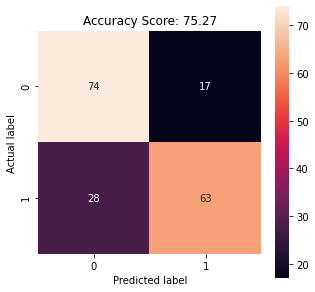

In [15]:
predictions = logisticRegr.predict(X_validate)
cm = metrics.confusion_matrix(Y_validate, predictions)

score = logisticRegr.score(X_validate, Y_validate)
r_score = round(score * 100, 2)
print(r_score)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".0f", square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(r_score)
plt.title(all_sample_title)

75.45


Text(0.5, 1.0, 'Accuracy Score: 75.45')

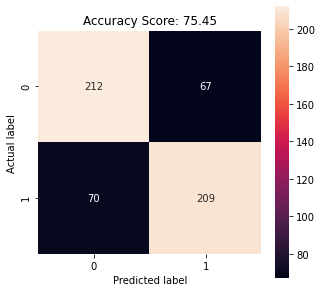

In [12]:
predictions_ = logisticRegr_.predict(X_validate_)
cm_ = metrics.confusion_matrix(Y_validate_, predictions_)

score_ = logisticRegr_.score(X_validate_, Y_validate_)
r_score_ = round(score_ * 100, 2)
print(r_score_)

plt.figure(figsize=(5,5))
sns.heatmap(cm_, annot=True, fmt=".0f", square = True)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title_ = 'Accuracy Score: {0}'.format(r_score_)
plt.title(all_sample_title_)

# ROC-curve

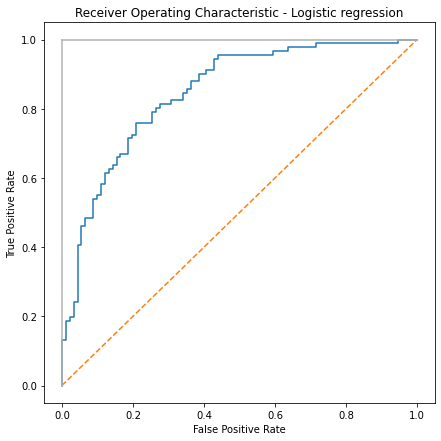

In [13]:
pred_prob = logisticRegr.predict_proba(X_validate)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(Y_validate, pred_prob)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

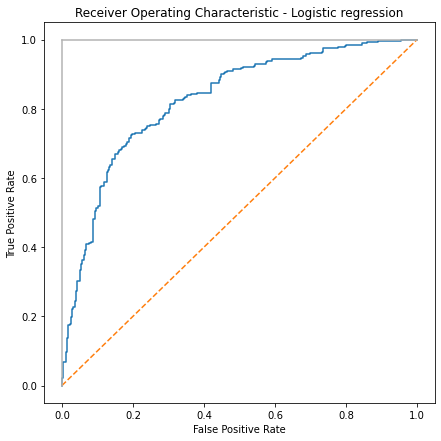

In [14]:
pred_prob_ = logisticRegr_.predict_proba(X_validate_)[:,1]
false_positive_rate_, true_positive_rate_, threshold_ = roc_curve(Y_validate_, pred_prob_)

plt.subplots(1, figsize=(7,7))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate_, true_positive_rate_)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()